In [1]:
import requests
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Prompt 1: Using our weather data to convert the day, temperature, and description into a csv file.

In [2]:
# Using Binghamton city's longitude and latitude to identify its "gridID", "gridX", and "gridY" values

lat = "42.098701"
lon = "-75.912537"
bing_weather = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

weather_json = bing_weather.json()
weather_json

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/42.0987,-75.9125',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-75.9125, 42.0987]},
 'properties': {'@id': 'https://api.weather.gov/p

In [3]:
# Using the gathered information to create a json_file of the data we want

url = "https://api.weather.gov/gridpoints/BGM/66,57/forecast"

weather = requests.get(url)
json_file = weather.json()

json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-75.9315877, 42.1111321],
    [-75.9357021, 42.0895688],
    [-75.9066508, 42.0865146],
    [-75.90253039999999, 42.1080777],
    [-75.9315877, 42.1111321]]]},
 'properties': {'updated': '2023-03-18T22:30:47+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-18T23:29:32+00:00',
  'updateTime': '2023-03-18T22:30:47+00:00',
  'validTimes': '2023-03-18T16:00:00+00:00/P7DT21H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 274.0152},
  'periods': [{'number': 1,
    'name': 'Tonight',
    'startTime': '2023-03-18T19:00:00-04:00',
    'endTime': '2023-03-19T06:00:00-04:00',
    'i

In [4]:
# Indexing the json_file to examine the data we want

json_file['properties']['periods']

[{'number': 1,
  'name': 'Tonight',
  'startTime': '2023-03-18T19:00:00-04:00',
  'endTime': '2023-03-19T06:00:00-04:00',
  'isDaytime': False,
  'temperature': 19,
  'temperatureUnit': 'F',
  'temperatureTrend': None,
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 50},
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': -6.111111111111111},
  'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 63},
  'windSpeed': '8 to 14 mph',
  'windDirection': 'W',
  'icon': 'https://api.weather.gov/icons/land/night/snow,50/snow,20?size=medium',
  'shortForecast': 'Chance Snow Showers',
  'detailedForecast': 'A chance of snow showers before 3am. Mostly cloudy, with a low around 19. West wind 8 to 14 mph. Chance of precipitation is 50%. New snow accumulation of less than one inch possible.'},
 {'number': 2,
  'name': 'Sunday',
  'startTime': '2023-03-19T06:00:00-04:00',
  'endTime': '2023-03-19T18:00:00-04:00',
  'isDaytime': True,
  'temperature': 33,
  'temperatu

In [5]:
# Examining

categories = ["name", "temperature", "temperatureUnit", "detailedForecast"]

for li in json_file['properties']['periods']:

    day = li[categories[0]]
    temp = str(li[categories[1]]) + str(li[categories[2]])
    descrip = li[categories[3]]
    
    print(day)
    print(temp)
    print(descrip)

Tonight
19F
A chance of snow showers before 3am. Mostly cloudy, with a low around 19. West wind 8 to 14 mph. Chance of precipitation is 50%. New snow accumulation of less than one inch possible.
Sunday
33F
A slight chance of snow showers between 7am and 4pm. Mostly cloudy, with a high near 33. West wind 14 to 17 mph. Chance of precipitation is 20%.
Sunday Night
21F
Partly cloudy, with a low around 21. West wind 7 to 14 mph.
Monday
50F
Sunny, with a high near 50. Southwest wind 8 to 13 mph.
Monday Night
29F
Mostly clear, with a low around 29. Southwest wind 3 to 9 mph.
Tuesday
53F
Mostly sunny, with a high near 53.
Tuesday Night
31F
Mostly cloudy, with a low around 31.
Wednesday
53F
A chance of rain showers after 2pm. Mostly cloudy, with a high near 53. Chance of precipitation is 30%.
Wednesday Night
41F
A chance of rain showers. Mostly cloudy, with a low around 41. Chance of precipitation is 50%.
Thursday
57F
A chance of rain showers. Mostly cloudy, with a high near 57. Chance of preci

In [6]:
# Storing the information into a csv file

weather_file = open("weather_data.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(weather_file)
csv_writer.writerow(["Day", "Temperature_Value", "Temperature", "Description"])

categories = ["name", "temperature", "temperatureUnit", "detailedForecast"]

for li in json_file['properties']['periods']:

    day = li[categories[0]]
    temp_int = int(li[categories[1]])
    temp = str(li[categories[1]]) + str(li[categories[2]])
    descrip = li[categories[3]]
    
    csv_writer.writerow([day, temp_int, temp, descrip])
    
weather_file.close()

In [7]:
data = pd.read_csv("weather_data.csv")
data.head(5)

,Day,Temperature_Value,Temperature,Description
0,Tonight,19,19F,A chance of snow showers before 3am. Mostly cl...
1,Sunday,33,33F,A slight chance of snow showers between 7am an...
2,Sunday Night,21,21F,"Partly cloudy, with a low around 21. West wind..."
3,Monday,50,50F,"Sunny, with a high near 50. Southwest wind 8 t..."
4,Monday Night,29,29F,"Mostly clear, with a low around 29. Southwest ..."


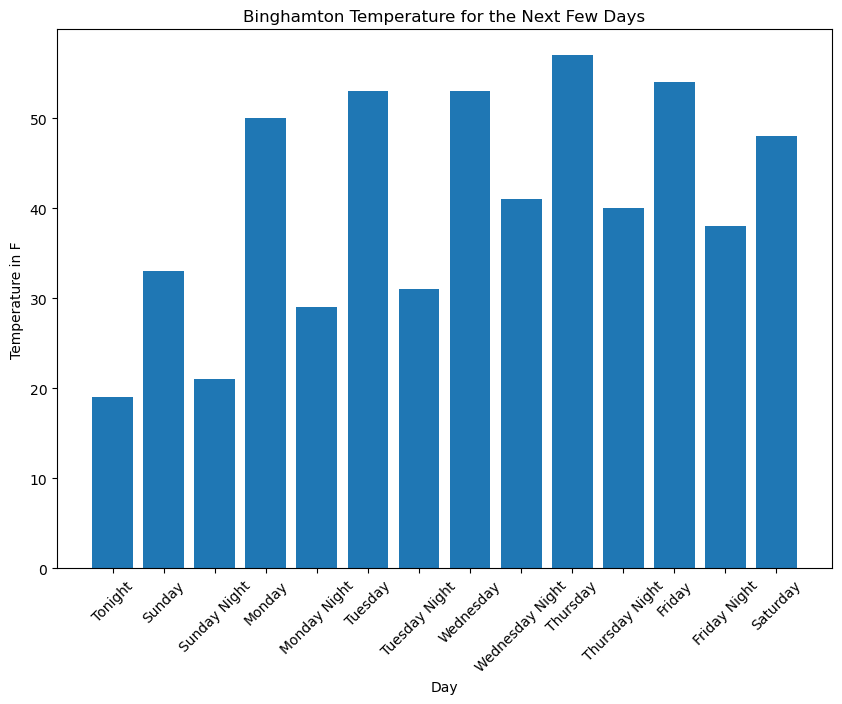

In [8]:
# Visualizing

df = pd.DataFrame(data)

day = df["Day"]
temp = df["Temperature_Value"]

fig = plt.figure(figsize = (10, 7))
plt.bar(day, temp)

plt.xlabel("Day")
plt.ylabel("Temperature in F")
plt.xticks(rotation = 45)
plt.title("Binghamton Temperature for the Next Few Days")

plt.show()

### Prompt 2: Public Holiday API

In [9]:
# Getting all available countries

url = f"https://date.nager.at/api/v3/AvailableCountries"

countries = requests.get(url)
json_file1 = countries.json()

json_file1

[{'countryCode': 'AD', 'name': 'Andorra'},
 {'countryCode': 'AL', 'name': 'Albania'},
 {'countryCode': 'AR', 'name': 'Argentina'},
 {'countryCode': 'AT', 'name': 'Austria'},
 {'countryCode': 'AU', 'name': 'Australia'},
 {'countryCode': 'AX', 'name': 'Åland Islands'},
 {'countryCode': 'BA', 'name': 'Bosnia and Herzegovina'},
 {'countryCode': 'BB', 'name': 'Barbados'},
 {'countryCode': 'BE', 'name': 'Belgium'},
 {'countryCode': 'BG', 'name': 'Bulgaria'},
 {'countryCode': 'BJ', 'name': 'Benin'},
 {'countryCode': 'BO', 'name': 'Bolivia'},
 {'countryCode': 'BR', 'name': 'Brazil'},
 {'countryCode': 'BS', 'name': 'Bahamas'},
 {'countryCode': 'BW', 'name': 'Botswana'},
 {'countryCode': 'BY', 'name': 'Belarus'},
 {'countryCode': 'BZ', 'name': 'Belize'},
 {'countryCode': 'CA', 'name': 'Canada'},
 {'countryCode': 'CH', 'name': 'Switzerland'},
 {'countryCode': 'CL', 'name': 'Chile'},
 {'countryCode': 'CN', 'name': 'China'},
 {'countryCode': 'CO', 'name': 'Colombia'},
 {'countryCode': 'CR', 'name':

In [10]:
# Getting country info for the specified country (Canada)

countryCode = 'CA' # storing the country code value into a variable
url = f"https://date.nager.at/api/v3/CountryInfo/{countryCode}" # including the variable in the api url

canada = requests.get(url)
json_file2 = canada.json()

json_file2

{'commonName': 'Canada',
 'officialName': 'Canada',
 'countryCode': 'CA',
 'region': 'Americas',
 'borders': [{'commonName': 'United States',
   'officialName': 'United States of America',
   'countryCode': 'US',
   'region': 'Americas',
   'borders': None}]}

In [11]:
# Getting long weekends for a specified country in a specified year (Canada in 2023)

countryCode = 'CA' # storing the country code value into a variable
year = 2023 # storing the country code value into a variable
url = f"https://date.nager.at/api/v3/LongWeekend/{year}/{countryCode}" # including the variables in the api url

canada = requests.get(url)
json_file3 = canada.json()

json_file3

[{'startDate': '2023-04-07',
  'endDate': '2023-04-09',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-05-20',
  'endDate': '2023-05-22',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-09-02',
  'endDate': '2023-09-04',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-10-07',
  'endDate': '2023-10-09',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-12-23',
  'endDate': '2023-12-25',
  'dayCount': 3,
  'needBridgeDay': False}]

In [12]:
# Getting public holidays for a specified country in a specified year (Canada in 2023)

countryCode = 'CA'
year = 2023
url = f"https://date.nager.at/api/v3/PublicHolidays/{year}/{countryCode}"

canada = requests.get(url)
json_file4 = canada.json()

json_file4

[{'date': '2023-01-01',
  'localName': "New Year's Day",
  'name': "New Year's Day",
  'countryCode': 'CA',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-02-20',
  'localName': 'Louis Riel Day',
  'name': 'Louis Riel Day',
  'countryCode': 'CA',
  'fixed': False,
  'global': False,
  'counties': ['CA-MB'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-02-20',
  'localName': 'Islander Day',
  'name': 'Islander Day',
  'countryCode': 'CA',
  'fixed': False,
  'global': False,
  'counties': ['CA-PE'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-02-20',
  'localName': 'Heritage Day',
  'name': 'Heritage Day',
  'countryCode': 'CA',
  'fixed': False,
  'global': False,
  'counties': ['CA-NS'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-02-20',
  'localName': 'Family Day',
  'name': 'Family Day',
  'countryCode': 'CA',
  'fixed': False,
  'global': False,
  'counties': 

In [13]:
# Checking if today is a public holiday in a specified country (Canada)

countryCode = 'CA'
url = f"https://date.nager.at/api/v3/IsTodayPublicHoliday/{countryCode}"

today = requests.get(url) # this api call isn't compatible with a json file so we just print its value
print(today) # a value of 204 indicates that today is not a public holiday in Canada

<Response [204]>


In [14]:
# Returning the upcoming public holidays for the next 365 days for a specified country (Canada)

countryCode = 'CA'
url = f"https://date.nager.at/api/v3/NextPublicHolidays/{countryCode}"

canada = requests.get(url)
json_file5 = canada.json()

json_file5

[{'date': '2023-04-07',
  'localName': 'Good Friday',
  'name': 'Good Friday',
  'countryCode': 'CA',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-10',
  'localName': 'Easter Monday',
  'name': 'Easter Monday',
  'countryCode': 'CA',
  'fixed': False,
  'global': False,
  'counties': ['CA-AB', 'CA-PE'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-23',
  'localName': "Saint George's Day",
  'name': "Saint George's Day",
  'countryCode': 'CA',
  'fixed': True,
  'global': False,
  'counties': ['CA-NL'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-22',
  'localName': "National Patriots' Day",
  'name': "National Patriots' Day",
  'countryCode': 'CA',
  'fixed': False,
  'global': False,
  'counties': ['CA-QC'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-22',
  'localName': 'Victoria Day',
  'name': 'Victoria Day',
  'countryCode': 'CA',
  'fixed': Fal

In [15]:
# Returning the upcoming public holidays for the next 7 days worldwide

countryCode = 'CA'
url = f"https://date.nager.at/api/v3/NextPublicHolidaysWorldwide"

canada = requests.get(url)
json_file6 = canada.json()

json_file6

[{'date': '2023-03-19',
  'localName': 'Josefstag',
  'name': "Saint Joseph's Day",
  'countryCode': 'CH',
  'fixed': True,
  'global': False,
  'counties': ['CH-LU',
   'CH-UR',
   'CH-SZ',
   'CH-NW',
   'CH-ZG',
   'CH-GR',
   'CH-TI',
   'CH-VS'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-19',
  'localName': 'Josefstag',
  'name': "Saint Joseph's Day",
  'countryCode': 'LI',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-19',
  'localName': 'San Ġużepp',
  'name': 'Feast of St. Joseph',
  'countryCode': 'MT',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-19',
  'localName': 'San Giuseppe',
  'name': "Saint Joseph's Day",
  'countryCode': 'VA',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-19',
  'localName': 'Día de San José',
  'name': "St J

In [16]:
# Getting the counts of public holidays from 10 specified countries and storing it in a csv file

country_codes = ['AU', 'BE', 'BR', 'CA', 'CH', 'CN', 'DK', 'ES', 'GB', 'JP']
year = 2023
d = {}

for countryCode in country_codes:
    url = f"https://date.nager.at/api/v3/PublicHolidays/{year}/{countryCode}"
    current = requests.get(url)
    d[countryCode] = len(current.json())

print(d)

{'AU': 21, 'BE': 11, 'BR': 14, 'CA': 30, 'CH': 19, 'CN': 7, 'DK': 15, 'ES': 34, 'GB': 16, 'JP': 16}
